# Diabetes Detection Project
The data set for this project consists of data about patients with and without diabetes, including a few tested metrics about the patients.

This data was sourced from https://www.kaggle.com/shantanudhakadd/diabetes-dataset-for-beginners.


# Preprocessing

# Model Dev

# Hyperparameter Tuning

# Feature importance


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Diabetes%20Detection/diabetes.csv"
diabetes_data = pd.read_csv('diabetes.csv')

In [ ]:
print(diabetes_data.shape)

sns.countplot(y= diabetes_data["Outcome"],data= diabetes_data)
diabetes_data.head()
diabetes_data .reshape(-1,1)
diabetes_data.head()
#Outcome = 1 if the patient has diabetes and 0 if not
#Glucose, SkinThickness, Insulin, BMI, Diabetes Pedigree Function, Age

Check for Null values in dataset

In [ ]:
diabetes_data_tf = diabetes_data.isnull()
null_values = np.sum(diabetes_data_tf)
print(null_values.shape)
print(null_values)

(9,)
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Run PCA

In [ ]:
from sklearn.decomposition import PCA

# (1) Initialize PCA object with 2 components
pca = PCA(n_components=4)

# (2) Learn Principal Components
principal_components = pca.fit_transform(diabetes_data)

# (3) Create Dataframe to hold spectograms and respective resistant antibiotics
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4'])
print(principal_df)

           PC1        PC2        PC3        PC4
0   -75.714249 -35.954944  -7.260683  15.670527
1   -82.358466  28.909559  -5.496649   9.004430
2   -74.630229 -67.909633  19.461753  -5.653114
3    11.077206  34.900175  -0.053004   1.314561
4    89.744156  -2.751263  25.213059  18.995906
..         ...        ...        ...        ...
763  99.237653  25.083009 -19.534828   4.438584
764 -78.641427  -7.685767  -4.137339  13.739069
765  32.112987   3.379222  -1.587972  -0.879451
766 -80.214095 -14.190595  12.351422 -14.292528
767 -81.308347  21.623042  -8.152774  13.821248

[768 rows x 4 columns]


In [ ]:
def create_pca_plot(category):
  principal_df[category] = diabetes_data[category] # Categories to visualize

  fig = plt.figure(figsize = (12, 8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('First Principal Component', fontsize = 15)
  ax.set_ylabel('Second Principal Component', fontsize = 15)
  targets = pd.unique(diabetes_data[category]).tolist() # All possible y values
  colors = ['red', 'blue', 'orange', 'purple','green','yellow','indigo'] # different colors for different targets
  colors = colors[:len(targets)]
  for target, color in zip(targets, colors):
      indicesToKeep = principal_df[category] == target
      ax.scatter(principal_df.loc[indicesToKeep, 'PC1'],
                principal_df.loc[indicesToKeep, 'PC2'],
                c = color, s = 40, alpha=0.75)
  if category == 'Pregnancies':
    names = ['None', '1 or More']

    '''
    for i in range(principal_df[category]):
      if np.where(principal_df) <1:
    '''

  elif category == 'Glucose':
    names = ['Low', 'High']
  elif category == 'BloodPressure':
    names = ['Low','High']
  elif category == 'SkinThickness':
    names = ['Low','High']
  elif category == 'Insulin':
    names = ['Low','High']
  elif category == 'BMI':
    names = ['Low','High']
  elif category == 'DiabetesPedigreeFunction':
    names = ['Low','High']
  elif category == 'Age':
    names = ['Low','High']
  ax.legend(targets, loc='lower right')
  ax.get_xaxis().set_ticks([]);
  ax.get_yaxis().set_ticks([]);
  plt.title(category)

In [ ]:
def seaborn_graph(category):
  sns.set(style = 'ticks')
  principal_df[category] = diabetes_data[category] # Categories to visualize
  fig = plt.figure(figsize = (12, 8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('First Principal Component', fontsize = 15)
  ax.set_ylabel('Second Principal Component', fontsize = 15)
  targets = pd.unique(diabetes_data[category]).tolist() # All possible y values
  sns.scatterplot(x ='PC1', y = 'PC2', hue = category, palette ='rocket', data = principal_df)
  ax.legend(targets, loc='lower right')
  ax.get_xaxis().set_ticks([]);
  ax.get_yaxis().set_ticks([]);
  plt.title(category)

In [ ]:
seaborn_graph('Pregnancies')
seaborn_graph('Glucose')
seaborn_graph('SkinThickness')
seaborn_graph('Insulin')
seaborn_graph('BMI')
seaborn_graph('DiabetesPedigreeFunction')
seaborn_graph('Age')

In [ ]:
diabetes_data_preprocessed = diabetes_data
diabetes_data_preprocessed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = diabetes_data_preprocessed.drop(columns = 'Outcome')
y = diabetes_data_preprocessed['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

Let's try a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lModel = LogisticRegression()
lModel.fit(x_train,y_train)
predictions = lModel.predict(x_test)
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
lModelOne = LogisticRegression()
scores = cross_val_score(lModelOne, x, y, cv=5, scoring='recall')
print(scores.mean())
print(scores.std())

Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print(accuracy_score(y_test,prediction))

0.6753246753246753


In [ ]:
clfOne = tree.DecisionTreeClassifier()
scores = cross_val_score(clfOne, x, y, cv=5, scoring='recall')
print(scores.mean())
print(scores.std())

0.5822501747030049
0.053334787340618986


The Decision Tree Model did worse by roughly 10 percent in terms of accuracy



Function to track the true positives, false positives, true negatives, and false negatives.

Goals


*   Minimize the number of false negatives at the expense of false positives or a small decrease in accuracy
*   Have the model reach an accuracy of at least 90%







Logistic Regression Model

In [ ]:
#predictions for logistic regression, and prediction for decisiontree
def heatMap(aprediction, title):
  confusion = confusion_matrix(y_test, aprediction)
  tp  = confusion[1][1]
  tn  = confusion[0][0]
  fp = confusion[0][1]
  fn = confusion[1][0]
  print(accuracy_score(y_test,aprediction))
  sns.heatmap(confusion, annot = True, fmt = 'd', cbar_kws={'label':'count'});
  plt.title(title)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

0.7792207792207793


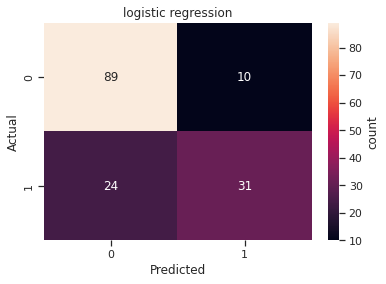

In [ ]:
heatMap(predictions,'logistic regression')#regression

Decision Tree Heat Map

0.6753246753246753


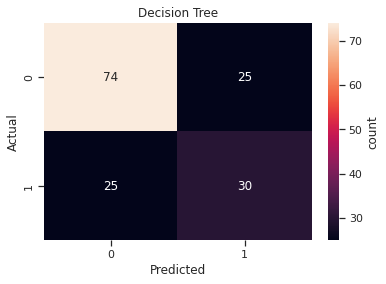

In [ ]:
heatMap(prediction, 'Decision Tree')

While the decision tree has less false negatves, the model is far less accurate about true positives and has a worse accuracy. Out of these two models, Logistic Regression is the better model for a problem so far.

Ridge Classifier

---


Random Forest Classifier

---



Support Vector Classifier


0.7792207792207793


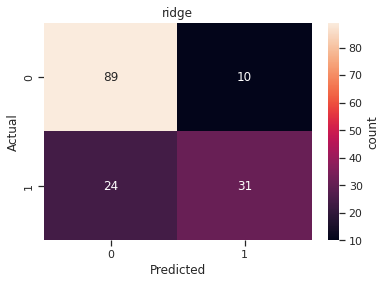

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(x_train,y_train)
predicitonridge = ridge.predict(x_test)
heatMap(predicitonridge, 'ridge')

In [ ]:
ridgeOne = RidgeClassifier()
scores = cross_val_score(ridgeOne, x, y, cv=5, scoring='recall')
print(scores.mean())
print(scores.std())

0.5598183088749126
0.05239431370393933


The Ridge Classfier got one more test question right than the Logistic Regression

Random Forest Classifier Heat Map

0.8376623376623377
0.8376623376623377


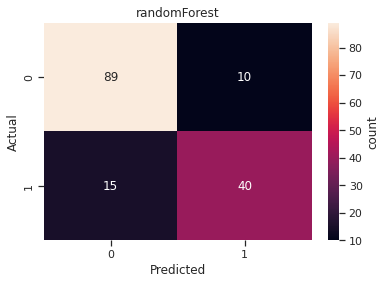

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(x_train,y_train)
predict = random.predict(x_test)
print(random.score(x_test,y_test))
heatMap(predict,'randomForest')

In [ ]:
randomOne = RandomForestClassifier()
scores = cross_val_score(randomOne, x, y, cv=5, scoring='recall')
print(scores.mean())
print(scores.std())

0.5858839972047518
0.06350252126622792


Hyperparameter tuning may help these two other models, but the Ridge Classifier is performing the best so far.

Support Vector Classifier

0.8051948051948052
0.8051948051948052


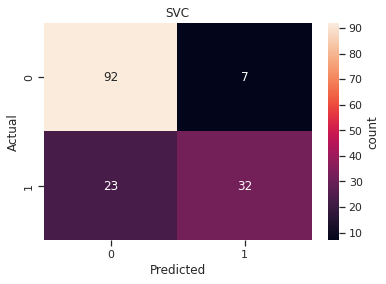

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(x_train, y_train)
svcpredict = svc.predict(x_test)
print(accuracy_score(y_test, svcpredict))
heatMap(svcpredict,"SVC")

In [ ]:
svcOne = make_pipeline(StandardScaler(), SVC(gamma='auto'))
scores = cross_val_score(svcOne, x, y, cv=5, scoring='recall')
print(scores.mean())
print(scores.std())

0.5598183088749127
0.06546320911139247


The tradeoff is 2% difference in accuracy for one less false negative

So far, it looks like either the Ridge Classifier or the Support Vector Classifier should be used.

F1 scores on each of the models

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) #logisitic regression model
print(classification_report(y_test, prediction)) #decision tree
print(classification_report(y_test,predicitonridge)) #ridge
print(classification_report(y_test,predict)) #random forest
print(classification_report(y_test,svcpredict)) #SVC
#svc and random forest models look to be the best models for this problem

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        99
           1       0.55      0.55      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

              preci

The precision is the ratio **tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio **tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.



Given that the main goal is to reduce the number of FN and maximize the number of TP, it may be best to focus on recall

Accuracy may not be the best scoring metric for this problem. We are most concerned with recall, as we want to minimize the number of false negatives.

Given this new metric, the SVC and the Random Forest model look to have both the best recall and accuracy, so let's look deeper into both.

For SVC, two important hyperparameters are C and Gamma. The C hyperparameter is a penalty for the a missclassified classification. This means we can punish our model for getting an incorrect answer.

Gamma, on the other hand. is the amount of grouping that the SVC will perform. A low gamma value means more points will get grouped together, whereas a high gamma will have specific values of closeness that the points should have. This can be used similair to a KNN, but for our model, we are only concerned about binary output. There is another problem with a large gamma value being that it is very likely to overfit as the model will be very specific about handling the points.

For Random Forest, there are multiple hyperparameters that we can choose for this model. max_depth is one hyperparameter that we can use to stop the tree from growing, thereby countering and limiting the overfitting.

We can also use the n_estimators to determine the numbers of trees that will be in the forest.

max_features is the number of maximum features that each tree will recieve.

In [ ]:
 from sklearn.model_selection import RandomizedSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 5 , 10 , 50, 100 , 500 ,1000],
              'gamma': [1, 0.5,0.1, 0.05,0.01, 0.005,0.001,0.0005,0.0001],
              'kernel': ['rbf']}

tuned_SVC = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_iter=40, scoring = "recall")

# fitting the model for grid search
tuned_SVC.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
print(tuned_SVC.best_params_)
print(tuned_SVC.best_estimator_)
tunedSVCPredict = tuned_SVC.predict(x_test)
print(classification_report(y_test,tunedSVCPredict))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [5, 25, 50, 75, 100, 125, 150, 175, 200 ,225],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 'sqrt', 'auto']
              }

tuned_rf = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,scoring = "recall")
# # fitting the model for grid search
tuned_rf.fit(x_train, y_train)

In [ ]:
print(tuned_rf.best_estimator_)
print(tuned_rf.best_params_)
RFPredict = tuned_rf.predict(x_test)

'''
new_input = [[0,0]]
gridPredict = grid.predict((input))
print(input)
print(gridPredict)
'''


RandomForestClassifier(max_features=6, n_estimators=200)
{'max_features': 6, 'n_estimators': 200}


'\nnew_input = [[0,0]]\ngridPredict = grid.predict((input))\nprint(input)\nprint(gridPredict)\n'

The Random Forest Classifier is performing the best.

Now that we know how to recieve user input and use our best model to predict their risk, we can now start analyzing why and how our model chooses if a patient has low or high risk for diabetes. Does it depend on Insulin and Glucose levels, or does the model rely on the SkinThickness parameter?

We can use the shap.treeExplainer class to explain how the model chooses which option to output based on what parameters the model prefers to use. For example, we can use the class to understand if the model relies heavily on the SkinThickness or the Insulin parameter as the one that is most important to it.

In [ ]:
# randomReal = RandomForestClassifier(max_features = 7, n_estimators = 35)
# scores = cross_val_score(randomReal, x, y, cv=5, scoring='recall') #train the model and get the mean and standard deviation values back
# print(scores.mean())
# print(scores.std())

In [ ]:
!pip install shap

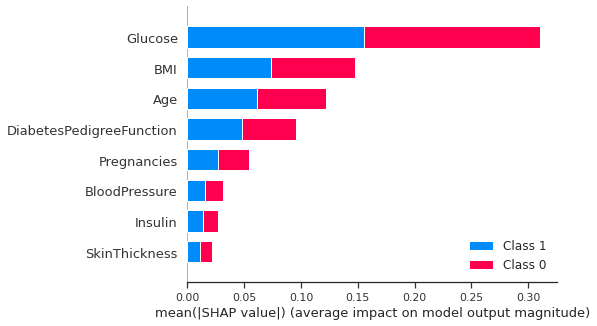

Expected Value: [0.65313518 0.34686482]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        99
           1       0.80      0.65      0.72        55

    accuracy                           0.82       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154



'\nErrors:\n\nDimensions for shap_values are not correct if the two errors below are dealt with.\n\n\nAssertionError: Model has no `estimators_`! Have you called `model.fit`?\n\n\nExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. \nIf your data shape is correct then please report this on GitHub. \nThis check failed because for one of the samples the sum of the SHAP values was 0.879143, while the model output was 0.800000. \nIf this difference is acceptable you can set check_additivity=False to disable this check.\n'

In [ ]:
#use the TreeExplainer on the random forest that we just trained using the hyperparameters and the cross_val_score
import shap
shap.initjs()
explainer = shap.TreeExplainer(tuned_rf.best_estimator_,data = None)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, features = x_test, plot_type = 'bar', title = "Categories in Order of Importance")
print('Expected Value:', explainer.expected_value)
print(classification_report(y_test, RFPredict))